In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings # for warning control
from scipy import stats
from scipy.stats import norm, skew #for statistical calculations

In [2]:
#import data
# data path, change when run on different computers!
path = 'D:/Columbia U/IEOR 4501 python/Project/data.csv' 
data = pd.read_csv(path)

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,25,26,27,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,55,56,57,60,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# examine our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 68 columns):
id                        65282 non-null int64
log_price                 65282 non-null float64
property_type             65282 non-null object
room_type                 65282 non-null object
accommodates              65282 non-null int64
bathrooms                 65127 non-null float64
bed_type                  65282 non-null object
cancellation_policy       65282 non-null object
cleaning_fee              65282 non-null bool
city                      65282 non-null object
first_review              52558 non-null object
host_has_profile_pic      65136 non-null object
host_identity_verified    65282 non-null bool
host_response_rate        50463 non-null object
host_since                65136 non-null object
instant_bookable          65282 non-null bool
last_review               52588 non-null object
latitude                  65282 non-null float64
longitude                 65282 

In [4]:
# do data cleaning by deleting unmeaningful columns 
del_cols=['Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67']
data.drop(del_cols,axis=1,inplace=True)
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
# check the datatypes of all variables.
pd.options.display.max_rows = 65
dtypes = data.dtypes.reset_index()
dtypes.columns = ["Count", "Column Type"]
dtypes

,Count,Column Type
0,id,int64
1,log_price,float64
2,property_type,object
3,room_type,object
4,accommodates,int64
5,bathrooms,float64
6,bed_type,object
7,cancellation_policy,object
8,cleaning_fee,bool
9,city,object


In [6]:
# group by types
dtypes.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,3
1,int64,2
2,float64,7
3,object,13


In [7]:
# divide the variables into numerical variables and categorical variables
num_var=['accommodates','bathrooms','cancellation_fee','first_view','host_response_rate','host_since','latitude','longitude','number_of_reviews','review_scores_rating',
        'zipcode','bedrooms','beds']
cate_var=['property_type','room_type','bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood']

In [8]:
# describe log_price column
data['log_price'].describe()

count    65282.000000
mean         4.785188
std          0.714140
min          0.000000
25%          4.317488
50%          4.718499
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [9]:
# calculate target variable
data['Saleprice']=np.exp(data['log_price'])

In [10]:
# draw histogram function
def drawHist(heights):
    plt.hist(heights, 20)
    plt.xlabel('Saleprice')
    plt.ylabel('Frequency')
    plt.title('Histogram of Saleprice')
    plt.show()

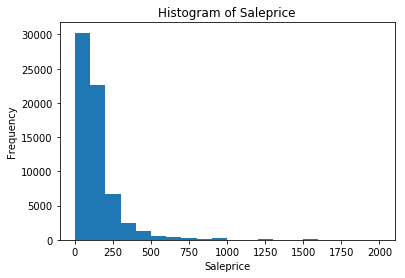

In [11]:
# draw 'Saleprice' histogram
drawHist(data['Saleprice'])

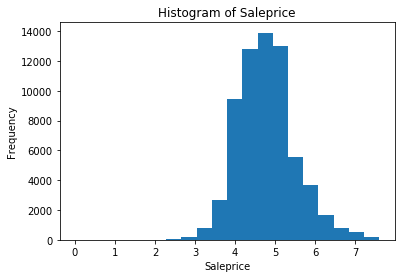

In [12]:
# draw 'log_price' histogram
drawHist(data['log_price'])
# The distribution is like a bell curve (normal distribution).

In [13]:
# drop 'Saleprice' variable to avoid complete correlation with 'log_price'
data.drop('Saleprice', axis=1, inplace=True)

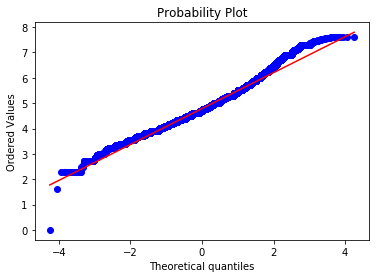

In [14]:
# plot probability distribution  
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
plt.show()

In [15]:
# data cleaning with dates function
import time
import datetime
def dif_time(date):
    now_time = datetime.datetime.now()
    now_time = now_time.strftime('%Y/%m/%d')
    d2 = datetime.datetime.strptime(now_time, '%Y/%m/%d')
    if str(date) !='nan':
        d1 = datetime.datetime.strptime(str(date),'%Y/%m/%d')
        day = (d2 - d1).days
        return day
    else:
        return None

In [16]:
# convert dates to number of days 
dates_to_transform=['first_review','host_since','last_review']
for col in dates_to_transform:
    data[col]=data[col].apply(dif_time)

In [17]:
# convert to type int
for u in data.columns:
    if data[u].dtype==bool:
        data[u]=data[u].astype('int')

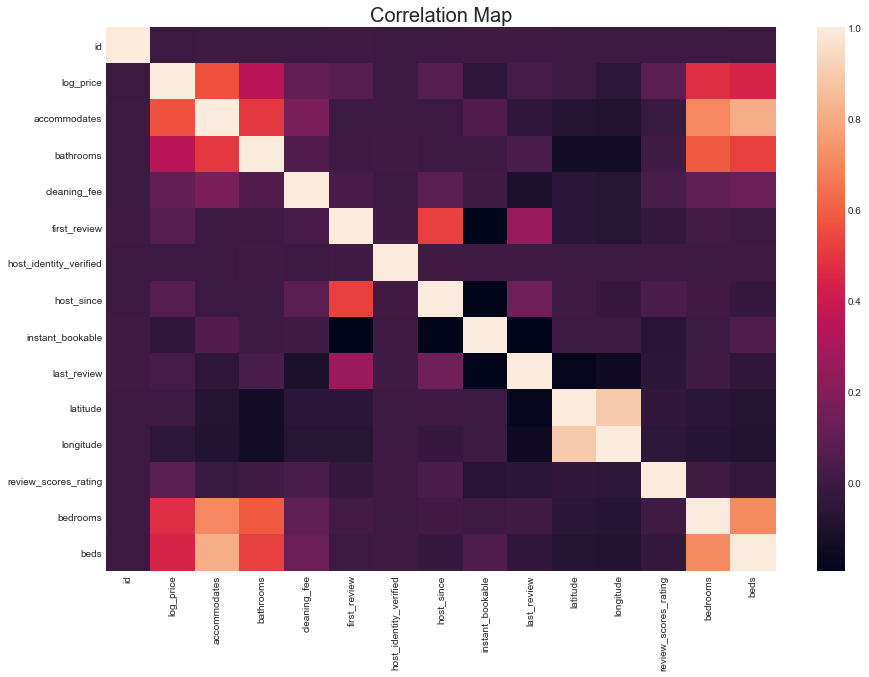

In [18]:
#plot correlation matrix
import seaborn as sns # for plotting statistical graphs
color = sns.color_palette()
sns.set_style('darkgrid')

def correlation_map(df):
    correlation = data.corr()
    plt.subplots(figsize=(15,10))
    plt.title('Correlation Map', fontsize=20)
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
    
correlation_map(data)

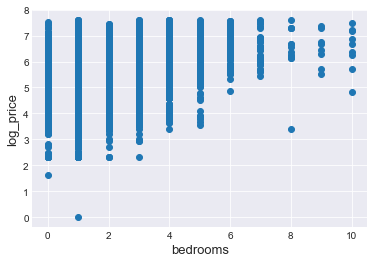

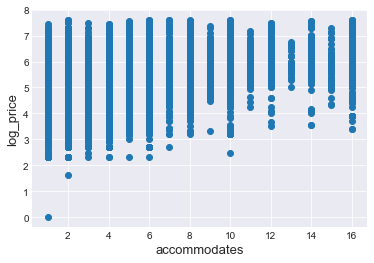

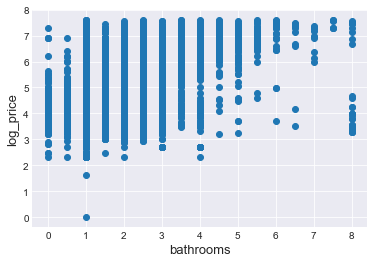

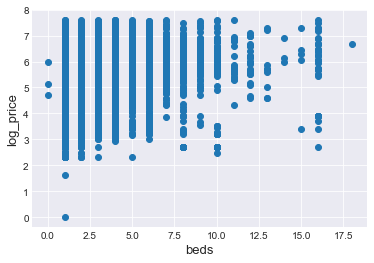

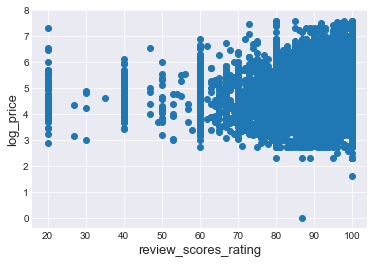

C:\Users\Vergil\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Vergil\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Vergil\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 864x864 with 0 Axes>

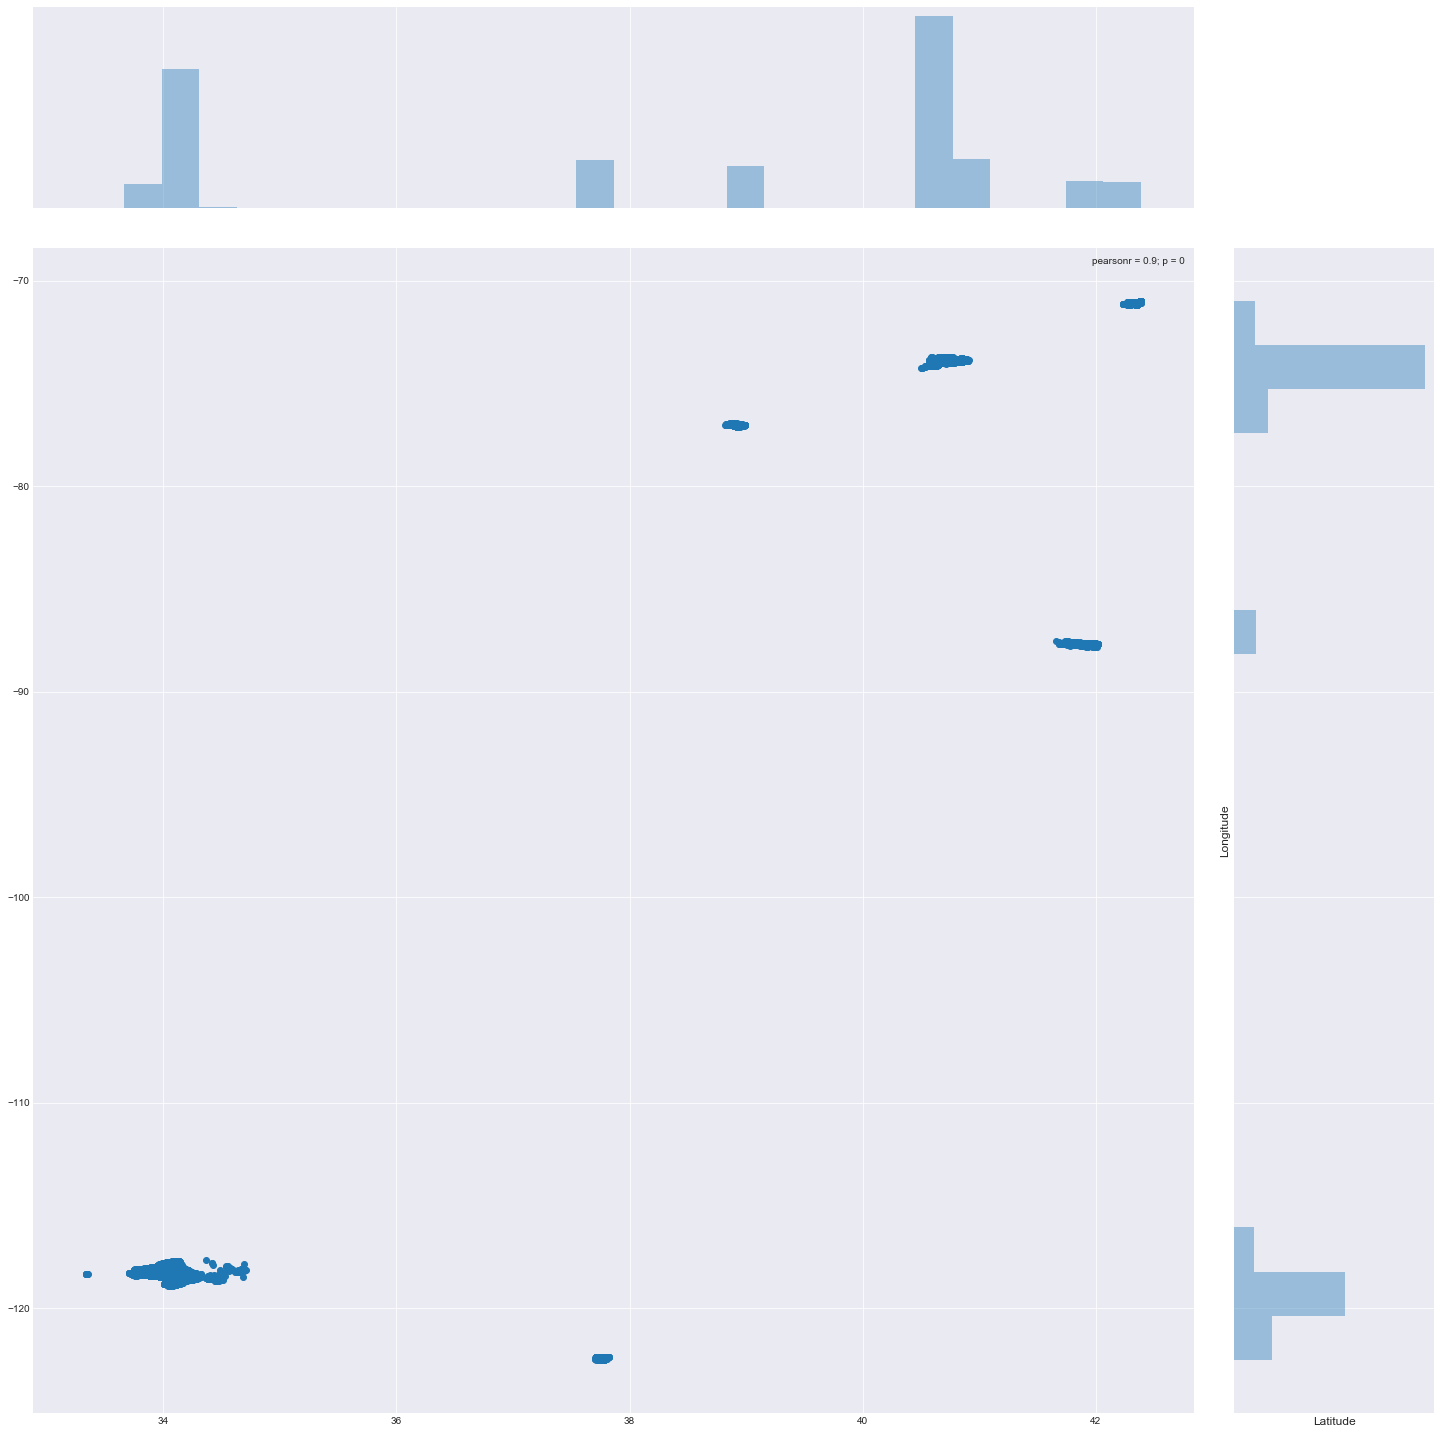

In [19]:
# scatter plot 
# log_price vs bedrooms
fig, ax = plt.subplots()
ax.scatter(data['bedrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bedrooms', fontsize=13)
plt.show()

# log_price vs accomodates
fig, ax = plt.subplots()
ax.scatter(data['accommodates'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('accommodates', fontsize=13)
plt.show()

# log_price vs bathrooms
fig, ax = plt.subplots()
ax.scatter(data['bathrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bathrooms', fontsize=13)
plt.show()

# log_price vs beds
fig, ax = plt.subplots()
ax.scatter(data['beds'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('beds', fontsize=13)
plt.show()

# log_price vs review_scores_rating
fig, ax = plt.subplots()
ax.scatter(data['review_scores_rating'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('review_scores_rating', fontsize=13)
plt.show()

# explore the latitude and longitude variable distributions by joint plotting them
plt.figure(figsize=(12,12))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=20)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

(-0.5, 4.5, 0, 10)

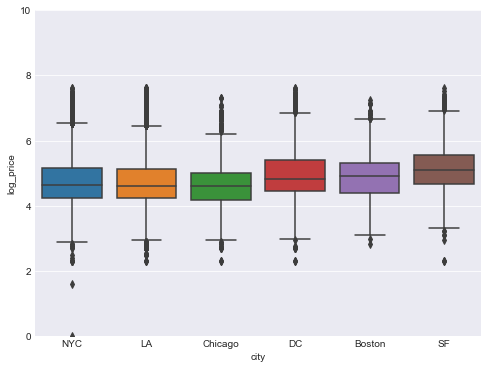

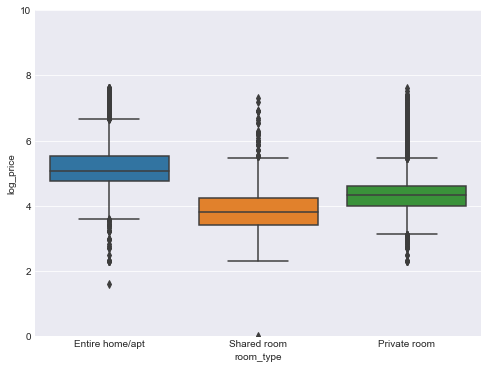

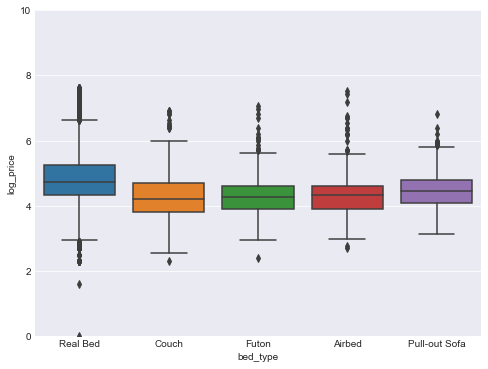

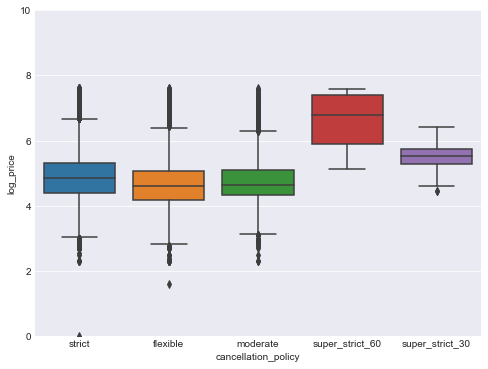

In [20]:
# box plot
# log_price vs city
var = 'city'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs room_type
var = 'room_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# # log_price vs property_type
# var = 'property_type'
# price_data = pd.concat([data['log_price'], data[var]], axis=1)
# f,ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="log_price", data=price_data)
# fig.axis(ymin=0, ymax=10)

# log_price vs bed_type
var = 'bed_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs cancellation_policy
var = 'cancellation_policy'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

In [21]:
#calculate missing data ratio
total_missing = data.isnull().sum()
missing_ratio = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total_missing, missing_ratio], axis=1, keys=['total_missing', 'missing_ratio'])
missing_data = missing_data.ix[missing_data['missing_ratio']>0]
missing_data = missing_data.sort_values(by='missing_ratio',ascending=False)
missing_data.head(20)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,total_missing,missing_ratio
host_response_rate,14819,0.227000
review_scores_rating,13439,0.205861
first_review,12724,0.194908
last_review,12694,0.194449
neighbourhood,5178,0.079317
zipcode,759,0.011626
bathrooms,155,0.002374
host_has_profile_pic,146,0.002236
host_since,146,0.002236
beds,123,0.001884


Text(0.5, 1.0, 'Ratio of missing data by properties')

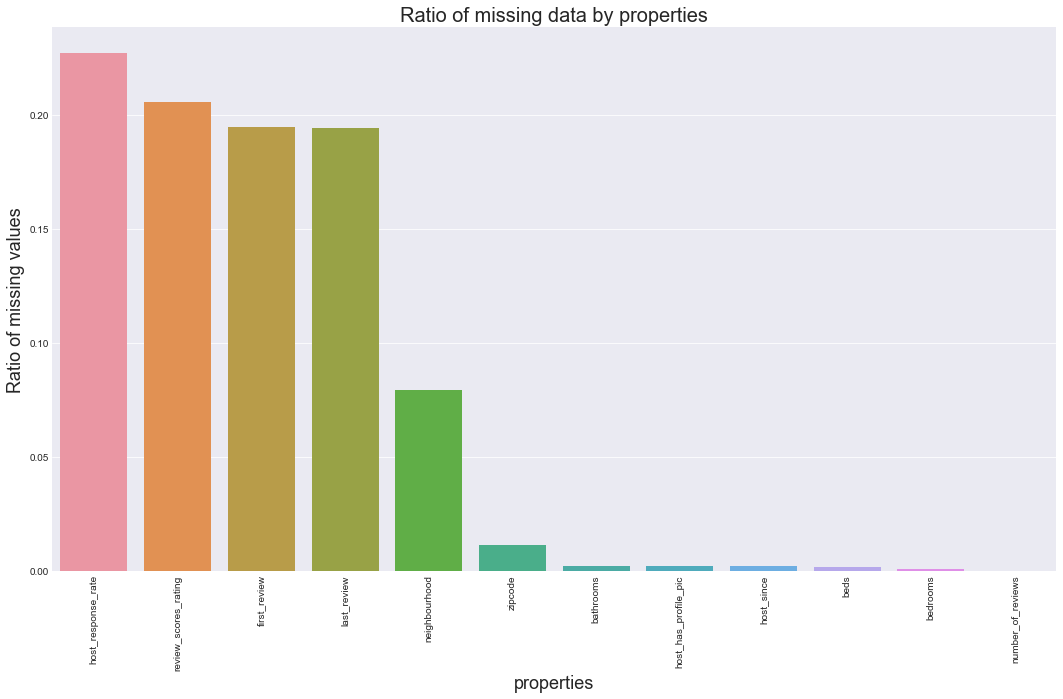

In [22]:
#plot ratio of missing
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data.missing_ratio)
plt.xlabel('properties', fontsize=18)
plt.ylabel('Ratio of missing values', fontsize=18)
plt.title('Ratio of missing data by properties', fontsize=20)

In [23]:
# to many missing_values
#delete column host_response_rate
data.drop('host_response_rate', axis=1, inplace=True)

In [24]:
# fill NA by none
col_to_fill=['neighbourhood','zipcode']
for col in col_to_fill:
    data[col] = data[col].fillna('None')

In [25]:
# only fetch data without "None" values
data = data[(data.neighbourhood != 'None') & (data.zipcode != 'None')]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59647 entries, 0 to 65277
Data columns (total 24 columns):
id                        59647 non-null int64
log_price                 59647 non-null float64
property_type             59647 non-null object
room_type                 59647 non-null object
accommodates              59647 non-null int64
bathrooms                 59498 non-null float64
bed_type                  59647 non-null object
cancellation_policy       59647 non-null object
cleaning_fee              59647 non-null int32
city                      59647 non-null object
first_review              48335 non-null float64
host_has_profile_pic      59506 non-null object
host_identity_verified    59647 non-null int32
host_since                59506 non-null float64
instant_bookable          59647 non-null int32
last_review               48364 non-null float64
latitude                  59647 non-null float64
longitude                 59647 non-null float64
neighbourhood            

In [27]:
# fill NA by none
fillbynone=['first_review','host_since','last_review','host_has_profile_pic','number_of_reviews']
for col in fillbynone:
    data[col] = data[col].fillna('None')

In [28]:
#fill NA by numerical value
fillbymedian=['review_scores_rating']
for col in fillbymedian:
    data[col] = data[col].fillna(data[col].transform(lambda x: x.fillna(x.median())))

In [29]:
#fill NA by mode (the value that occurs most frequently in a given set of data)
fillbymode=['bathrooms','beds','bedrooms']
for col in fillbymode:
    data[col] = data[col].fillna(data[col].mode()[0])

In [30]:
# check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)

In [31]:
# transform some variables to string type
data['bedrooms'] = data['bedrooms'].apply(str)
data['bathrooms'] = data['bathrooms'].apply(str)
data['accommodates']=data['accommodates'].apply(str)
data['beds']=data['beds'].apply(str)

In [32]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,20605308,6.684612,House,Entire home/apt,16,5.0,Real Bed,strict,1,NYC,...,1,434,40.684922,-73.954891,Bedford-Stuyvesant,70,95.0,11216,8.0,18.0
1,2186452,6.388561,House,Entire home/apt,16,7.0,Real Bed,strict,0,LA,...,1,582,33.975376,-118.295995,South LA,16,100.0,90044,10.0,16.0
2,17764355,5.700444,House,Entire home/apt,16,5.0,Real Bed,strict,1,Chicago,...,0,624,41.947212,-87.655574,Wrigleyville,13,95.0,60613,10.0,16.0
3,1446537,7.170120,House,Entire home/apt,16,7.0,Real Bed,flexible,0,LA,...,0,598,34.048690,-118.319579,Mid-Wilshire,0,89.0,90019,10.0,16.0
4,13399619,6.257668,House,Entire home/apt,16,4.0,Real Bed,flexible,0,NYC,...,1,None,40.674952,-73.819140,South Ozone Park,0,96.0,11420,10.0,16.0


In [33]:
data.to_csv('data_modified.csv',index=False)

In [36]:
# explore skewness of data
numeric_feats =data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 8 skewed numerical features to Box Cox transform


In [37]:
# use LabelEncoder to normalize labels and to transform non-numerical labels to numerical labels. 
from sklearn.preprocessing import LabelEncoder
for c in data.columns:
    if data[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values))
        data[c] = lbl.transform(list(data[c].values))

In [37]:
# drop unecessary id information
data.drop('id', axis=1, inplace=True)

In [38]:
# split data to train and test for future regression
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(data,test_size=0.2)

In [39]:
train_data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
12447,5.273000,0,0,10,2,4,1,1,3,678,...,0,937,34.104939,-118.267453,496,328,99.0,629,3,10
10313,4.077537,17,1,9,3,4,2,0,4,275,...,0,202,40.714475,-73.852862,211,198,80.0,285,1,11
62953,4.454347,0,0,8,2,4,2,1,3,404,...,0,915,34.076887,-118.359647,356,486,93.0,646,0,1
33129,5.010635,0,0,10,2,3,1,1,4,1969,...,0,778,40.671312,-73.949790,145,2,100.0,206,1,1
31758,4.262680,0,1,0,2,4,2,1,4,2014,...,1,823,40.777776,-73.949021,562,2,100.0,86,1,1


In [40]:
test_data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
8709,4.744932,0,0,12,3,4,1,1,1,23,...,1,930,41.807802,-87.612930,82,402,87.0,497,3,11
42795,4.976734,0,0,8,2,4,0,1,3,2176,...,0,956,33.869643,-118.394652,263,415,95.0,703,1,1
35522,4.234107,17,1,8,2,4,2,1,3,837,...,0,959,34.233830,-118.504567,412,44,98.0,889,1,1
25868,4.605170,0,0,8,2,4,2,1,4,1147,...,0,63,40.763610,-73.917931,32,198,80.0,168,3,1
44484,4.595120,17,1,8,2,4,1,1,4,672,...,0,764,40.808396,-73.951228,255,445,93.0,49,1,1


In [41]:
# examine our data
train_data.info

<bound method DataFrame.info of        log_price  property_type  room_type  accommodates  bathrooms  bed_type  \
12447   5.273000              0          0            10          2         4   
10313   4.077537             17          1             9          3         4   
62953   4.454347              0          0             8          2         4   
33129   5.010635              0          0            10          2         3   
31758   4.262680              0          1             0          2         4   
13892   5.857933              0          0            12          2         4   
21146   4.859812              1          0            10          2         4   
42903   4.007333             17          1             0          2         4   
1620    5.356586             26          0            14          6         4   
21374   4.787492              0          0            10          2         4   
39360   4.382027              0          1             0          2         4

In [42]:
# examine our data
test_data.info

<bound method DataFrame.info of        log_price  property_type  room_type  accommodates  bathrooms  bed_type  \
8709    4.744932              0          0            12          3         4   
42795   4.976734              0          0             8          2         4   
35522   4.234107             17          1             8          2         4   
25868   4.605170              0          0             8          2         4   
44484   4.595120             17          1             8          2         4   
13503   5.105945              0          0            11          2         4   
22907   4.499810              0          0             9          2         4   
55673   5.521461              0          0             8          2         4   
3780    5.703782             17          0            12          5         4   
11238   5.616771             17          0            10          2         4   
1893    5.991465              0          0            14          3         4

In [43]:
#if one column only has one value, consider to delete the column
train_columns_to_remove = [col for col in train_data.columns if train_data[col].nunique() == 1]
test_columns_to_remove = [col for col in test_data.columns if test_data[col].nunique() == 1]

In [44]:
# no need to remove columns
print(train_columns_to_remove)
print(test_columns_to_remove)

[]
[]


In [45]:
# check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)
# No missing data! Data preprocessing finished! Continue.

In [47]:
from sklearn.model_selection import KFold, cross_val_score #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by d


In [49]:
import lightgbm as lgb

In [50]:
params = {"objective" : "regression", "metric" : "rmse", "max_depth": 8, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 257, "learning_rate" : 0.01, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 5}
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=False, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)

In [51]:
X = train_data.drop('log_price', axis=1)
y = train_data['log_price']
X_test = test_data.drop('log_price', axis=1)
y_test = test_data['log_price']

In [ ]:
#LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient.

In [54]:
####################
### LightGBM ###
####################
prediction = np.zeros(test_data.shape[0])

for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    #print(f'Train samples: {len(train_index)}. Valid samples: {len(test_index)}')
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
            verbose=500, early_stopping_rounds=10)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
prediction /= n_fold

# RMSE = 0.3

Fold: 0
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.352357	valid_1's rmse: 0.391444
[1000]	training's rmse: 0.330096	valid_1's rmse: 0.385027
Early stopping, best iteration is:
[1146]	training's rmse: 0.325001	valid_1's rmse: 0.384328
Fold: 1
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.353147	valid_1's rmse: 0.395585
[1000]	training's rmse: 0.330721	valid_1's rmse: 0.388471
Early stopping, best iteration is:
[1009]	training's rmse: 0.330462	valid_1's rmse: 0.388438
Fold: 2
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.353831	valid_1's rmse: 0.379671
[1000]	training's rmse: 0.331059	valid_1's rmse: 0.371295
Early stopping, best iteration is:
[1166]	training's rmse: 0.325695	valid_1's rmse: 0.370237
Fold: 3
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 0.353233	valid_1's rmse: 0.391665
[1000]	training's rmse: 0.330747	valid_

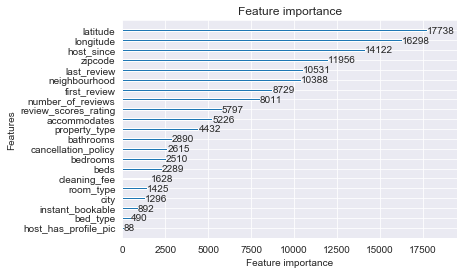

In [55]:
# Use lgb model to list the feature importance from the most important feature to the least important feature.

lgb.plot_importance(model, max_num_features=30);

In [56]:
# import catboost library
from catboost import CatBoostRegressor

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [ ]:
# Catboost is a library which was just published last year, and it focused on machine learning.
#It is a newly invented library which includes lots of advantages. 
#First, it can directly deal with Categorical features and there is no need to explicitly convert to numerical features when using this library.
#Second, it is much faster to run this Catboost library to do machine learning comparing to Light GBM and Xboost method.

In [58]:
####################
### CatBoost ###
####################
model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             #metric_period = 50,
                             od_wait=20)
model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              use_best_model=True,
              verbose=True)
    
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


# RMSE = 0.4157311679

0:	learn: 4.3724684	test: 4.3823169	best: 4.3823169 (0)	total: 141ms	remaining: 2m 20s
1:	learn: 3.9443904	test: 3.9539729	best: 3.9539729 (1)	total: 670ms	remaining: 5m 34s
2:	learn: 3.5621938	test: 3.5713697	best: 3.5713697 (2)	total: 1.34s	remaining: 7m 24s
3:	learn: 3.2175435	test: 3.2261132	best: 3.2261132 (3)	total: 1.86s	remaining: 7m 43s
4:	learn: 2.9052954	test: 2.9133561	best: 2.9133561 (4)	total: 1.97s	remaining: 6m 31s
5:	learn: 2.6281744	test: 2.6362480	best: 2.6362480 (5)	total: 2s	remaining: 5m 31s
6:	learn: 2.3775805	test: 2.3852577	best: 2.3852577 (6)	total: 2.59s	remaining: 6m 8s
7:	learn: 2.1535886	test: 2.1610491	best: 2.1610491 (7)	total: 3.22s	remaining: 6m 39s
8:	learn: 1.9532481	test: 1.9603733	best: 1.9603733 (8)	total: 3.79s	remaining: 6m 57s
9:	learn: 1.7726861	test: 1.7797110	best: 1.7797110 (9)	total: 3.96s	remaining: 6m 32s
10:	learn: 1.6123139	test: 1.6192954	best: 1.6192954 (10)	total: 4.06s	remaining: 6m 4s
11:	learn: 1.4684139	test: 1.4751853	best: 1.4

93:	learn: 0.4126185	test: 0.4229062	best: 0.4229062 (93)	total: 31.8s	remaining: 5m 6s
94:	learn: 0.4126176	test: 0.4229070	best: 0.4229062 (93)	total: 31.9s	remaining: 5m 3s
95:	learn: 0.4126159	test: 0.4229065	best: 0.4229062 (93)	total: 31.9s	remaining: 5m
96:	learn: 0.4126159	test: 0.4229063	best: 0.4229062 (93)	total: 32s	remaining: 4m 57s
97:	learn: 0.4126158	test: 0.4229061	best: 0.4229061 (97)	total: 32s	remaining: 4m 54s
98:	learn: 0.4126151	test: 0.4229070	best: 0.4229061 (97)	total: 32s	remaining: 4m 51s
99:	learn: 0.4126144	test: 0.4229080	best: 0.4229061 (97)	total: 32s	remaining: 4m 48s
100:	learn: 0.4123460	test: 0.4224927	best: 0.4224927 (100)	total: 32.2s	remaining: 4m 46s
101:	learn: 0.4123459	test: 0.4224920	best: 0.4224920 (101)	total: 32.3s	remaining: 4m 44s
102:	learn: 0.4123445	test: 0.4224914	best: 0.4224914 (102)	total: 32.3s	remaining: 4m 41s
103:	learn: 0.4123439	test: 0.4224923	best: 0.4224914 (102)	total: 32.3s	remaining: 4m 38s
104:	learn: 0.4123425	test:

188:	learn: 0.4055390	test: 0.4170357	best: 0.4170357 (188)	total: 39.7s	remaining: 2m 50s
189:	learn: 0.4055390	test: 0.4170357	best: 0.4170357 (189)	total: 39.8s	remaining: 2m 49s
190:	learn: 0.4055390	test: 0.4170357	best: 0.4170357 (190)	total: 39.8s	remaining: 2m 48s
191:	learn: 0.4055390	test: 0.4170357	best: 0.4170357 (191)	total: 39.8s	remaining: 2m 47s
192:	learn: 0.4048049	test: 0.4163000	best: 0.4163000 (192)	total: 40.3s	remaining: 2m 48s
193:	learn: 0.4047343	test: 0.4162430	best: 0.4162430 (193)	total: 40.9s	remaining: 2m 50s
194:	learn: 0.4047343	test: 0.4162430	best: 0.4162430 (193)	total: 41s	remaining: 2m 49s
195:	learn: 0.4047343	test: 0.4162430	best: 0.4162430 (193)	total: 41s	remaining: 2m 48s
196:	learn: 0.4047343	test: 0.4162430	best: 0.4162430 (193)	total: 41s	remaining: 2m 47s
197:	learn: 0.4047343	test: 0.4162430	best: 0.4162430 (193)	total: 41.1s	remaining: 2m 46s
198:	learn: 0.4047343	test: 0.4162430	best: 0.4162430 (193)	total: 41.1s	remaining: 2m 45s
199:	

In [34]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from matplotlib import rcParams
#import scipy.stats as st
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import RandomizedSearchCV # Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout, BatchNormalization
#from keras.layers.advanced_activations import PReLU
#from keras.layers.noise import GaussianDropout
#from keras.optimizers import Adam
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer

In [35]:
### read data and process categorical data

data = pd.read_csv('data_modified.csv')

## Basic Statistic
print("logPrice Min")
print(data['log_price'].min())
print("logPrice Mean")
print(data['log_price'].mean())
print("logPrice Median")
print(data['log_price'].median())
print("logPrice Max")
print(data['log_price'].max())
print("logPrice Std")
print(data['log_price'].std())

### Another way to handle the categorical variables
# data = data.merge(pd.get_dummies(data.property_type, drop_first=True, prefix='PT'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.room_type, drop_first=True, prefix='RT'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.bed_type, drop_first=True, prefix='BT'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.cancellation_policy, drop_first=True, prefix='CP'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.city, prefix='City'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.host_has_profile_pic, drop_first=True, prefix='HHPP'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.host_identity_verified, drop_first=True, prefix='HHPV'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.instant_bookable, drop_first=True, prefix='IB'), left_index=True, right_index=True)
# data = data.merge(pd.get_dummies(data.neighbourhood, drop_first=True, prefix='NE'), left_index=True, right_index=True)

# del data['property_type']
# del data['room_type'],
# del data['bed_type']
# del data['cancellation_policy']
# del data['city']
# del data['host_has_profile_pic']
# del data['host_identity_verified']
# del data['instant_bookable']
# del data['neighbourhood']
# del data['Saleprice']

for c in data.columns:
    if data[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(data[c].values))
        data[c] = lbl.transform(list(data[c].values))


D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


logPrice Min
0.0
logPrice Mean
4.796634893877489
logPrice Median
4.744932128
logPrice Max
7.600402335
logPrice Std
0.7083783806680068


In [36]:
### prepare train data set and test data set for analysis

data.drop(['id'], axis=1, inplace=True)
X = data.drop("log_price",axis=1).values
y = data["log_price"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [37]:
#select features using threshold
thresh = 5 * 10**(-2)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
# test 
select_X_test = selection.transform(X_test)

In [38]:
### Test the scores for XGBoost
xgb1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb1.fit(X_train, y_train)

y_hat = xgb1.predict(X_test)

print(f'The score for the attempted xgboost test is {xgb1.score(X_test,y_test)}')

n_folds = 10
kfold = KFold(n_splits=n_folds, random_state=42)
cv_results = cross_val_score(model, X_train, y_train, cv= kfold,scoring='r2', n_jobs=-1)

print(f'The scores, measured by R-squared, for the 10fold cross_validation are {cv_results}')

The score for the attempted xgboost test is 0.7114207954774321
The scores, measured by R-squared, for the 10fold cross_validation are [0.6755695  0.66389491 0.65844414 0.66490731 0.65550101 0.65761687
 0.67727967 0.66670506 0.67396563 0.66538523]


In [40]:
###############
### XGBoost ###
###############

### prepare xgboost parameters
xgb_params = {
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.75,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1
}

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)

num_boost_rounds = 200
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

xgb_pred1 = model.predict(dtest)

print(f'The mean absolute error using the original training data set is {mean_absolute_error(xgb_pred1, y_test)}')
print(f'The mean squared error using the original training data set is {mean_squared_error(xgb_pred1, y_test)}')


### Use the selected features
xgb_params = {
    'eta': 0.03,
    'max_depth': 10,
    'subsample': 0.75,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(select_X_train, y_train)
dtest = xgb.DMatrix(select_X_test)

num_boost_rounds = 200

model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=num_boost_rounds)

xgb_pred2 = model.predict(dtest)

print(f'The mean absolute error using training data set only has the selected features is {mean_absolute_error(xgb_pred2, y_test)}')

print(f'The mean squared error using training data set only has the selected features is {mean_squared_error(xgb_pred2, y_test)}')
      
      
print("It seems that only using the selected features doesn't improve the performance at all")
      

The mean absolute error using the original training data set is 0.2778425302450601
The mean squared error using the original training data set is 0.14871728266759848
The mean absolute error using training data set only has the selected features is 0.3030763474202218
The mean squared error using training data set only has the selected features is 0.17318356107795638
It seems that only using the selected features doesn't improve the performance at all


In [41]:
### comparise the true value with predicted value
df = pd.DataFrame()
df['log_price'] = y_test
df['predicted_log_price'] = xgb_pred1
print('Comparision between the true value and the predicted value using xgboost')
print(df)

Comparision between the true value and the predicted value using xgboost
       log_price  predicted_log_price
0       4.897840             4.596248
1       3.583519             3.825458
2       3.912023             4.479500
3       5.010635             4.831698
4       5.214936             5.166008
5       4.174387             4.303888
6       5.433722             5.828898
7       4.382027             4.706999
8       4.077537             4.022198
9       4.691348             4.532335
10      4.867534             5.077388
11      5.293305             5.266128
12      4.007333             4.081565
13      4.442651             4.177398
14      5.003946             4.877757
15      4.406719             4.452731
16      4.941642             5.140490
17      3.218876             3.926163
18      4.595120             5.232632
19      4.941642             5.091015
20      6.109248             6.150743
21      3.688879             4.455571
22      4.605170             4.957260
23      4.96981

In [42]:
####################
### RandomForest ###
####################


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

print(f'The best parameter set searched by RandomForest is {rf_random.best_params_}')

y_hat = rf_random.predict(X_test)

print(f'The mean absolute error for the RandomForest method is {mean_absolute_error(y_hat, y_test)}')

print(f'The mean squared error for the RandomForest method is {mean_squared_error(y_hat, y_test)}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.7min finished


The best parameter set searched by RandomForest is {'n_estimators': 190, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}
The mean absolute error for the RandomForest method is 0.28342134071626085
The mean squared error for the RandomForest method is 0.154729605164861


In [43]:
### comparise the true value with predicted value
df = pd.DataFrame()
df['log_price'] = y_test
df['predicted_log_price'] = y_hat
print('Comparision between the true value and the predicted value using RandomForest')
print(df)

Comparision between the true value and the predicted value using RandomForest
       log_price  predicted_log_price
0       4.897840             4.575957
1       3.583519             3.862442
2       3.912023             4.504398
3       5.010635             4.872754
4       5.214936             5.174000
5       4.174387             4.280039
6       5.433722             5.624201
7       4.382027             4.365540
8       4.077537             4.034211
9       4.691348             4.592510
10      4.867534             5.124463
11      5.293305             5.565855
12      4.007333             3.989055
13      4.442651             4.221362
14      5.003946             4.859863
15      4.406719             4.462150
16      4.941642             5.181578
17      3.218876             3.924003
18      4.595120             5.167324
19      4.941642             5.132080
20      6.109248             6.222290
21      3.688879             4.457174
22      4.605170             5.121006
23      4.